### Import libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Use pandas to read the csv

In [15]:
loans_df = pd.read_csv('../../data/loans_clean.csv', index_col=0)

### Explore your dataframe

Use a method to explore the `first five rows` of the df

In [16]:
loans_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,addr_state,dti,total_rec_late_fee,purpose,loan_status
0,76333286,15000.0,36 months,6.97,462.96,A,A3,5 year,MORTGAGE,60000.0,GA,21.84,0.000000,credit_card,Fully Paid
1,31217609,8000.0,36 months,16.29,282.41,D,D2,10 year,OWN,43000.0,FL,24.81,0.000000,other,Fully Paid
2,1278205,3500.0,60 months,20.50,93.71,E,E2,5 year,OWN,34000.0,OH,21.07,14.968877,debt_consolidation,Charged Off
3,130928637,3700.0,36 months,23.87,144.91,E,E2,1 year,RENT,36000.0,WA,16.73,0.000000,vacation,Current
4,71845894,24000.0,36 months,14.46,825.64,C,C4,10 year,MORTGAGE,106404.0,CA,13.54,0.000000,home_improvement,Fully Paid


Immediately we can tell you that we won't need the columns listed below. Let' take them out of the df.

In [9]:
columns_to_delete = ['id', 'sub_grade', 'addr_state', 'purpose']

loans_df.drop(columns=columns_to_delete, inplace=True)

Use a method to check the `summary` of your numerical columns

In [10]:
loans_df.describe()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,total_rec_late_fee
count,207954.000000,207954.000000,207954.000000,207954.000000,2.079540e+05,207954.000000,207954.000000
mean,103976.500000,15228.860950,13.039510,450.859652,7.983619e+04,18.533232,1.284585
std,60031.293277,9208.162242,4.831344,268.083216,7.442074e+04,11.669183,10.233253
min,0.000000,900.000000,5.310000,21.810000,4.000000e+02,0.000000,0.000000
25%,51988.250000,8000.000000,9.440000,256.040000,4.800000e+04,11.820000,0.000000
50%,103976.500000,13000.000000,12.620000,383.070000,6.700000e+04,17.690000,0.000000
75%,155964.750000,20000.000000,15.800000,599.960000,9.500000e+04,24.250000,0.000000
max,207953.000000,40000.000000,30.990000,1618.030000,1.099920e+07,999.000000,1098.360001


Check the `shape` of your dataframe to discover how many observations and features you have

In [11]:
loans_df.shape

(207954, 12)

Use a method to check the `type` of your columns 


In [12]:
loans_df.dtypes

Unnamed: 0              int64
loan_amnt             float64
term                   object
int_rate              float64
installment           float64
grade                  object
emp_length             object
home_ownership         object
annual_inc            float64
dti                   float64
total_rec_late_fee    float64
loan_status            object
dtype: object

### Visualisation

Seaborn is our go-to visualisation library as it gives us great graphs without to many coding.

##### Scatterplots

**Scatterplots** are a usefull tool to identify relationships between two numerical variables. 

We've already plotted `loan amount` vs the `installment` in the lecture. Makes sense though that there's a relationship. The relationship is however not always that clear

Let's plot `loan amount` versus `total late payments` to see if people who loan more, generally have more difficulties to pay back their loan

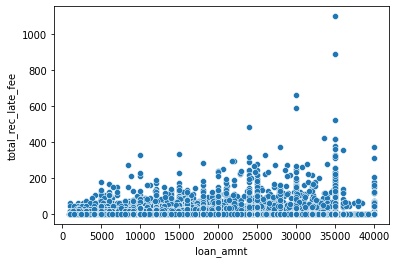

In [7]:
sns.scatterplot(data=loans_df, x='loan_amnt', y= 'total_rec_late_fee');

Since this shows us the correlation of these variables we can carefully conclude that there is a postive correlation between `loan_amnt` and `total_rec_late_fee`.

For further analysis let's create an extra column called `'has_late_fees'` where we want a `boolean` that defines if a customer has had late fees. So we want a `True` if `total_rec_late_fee` > 0.

In [25]:
loans_df['has_late_fees'] = loans_df['total_rec_late_fee'] > 0

#### Histograms

**Histograms** show you the distribution of a numerical variable.

Loan status will be a variable of interest throughout the lectures. Let's have a look at it's distribution.

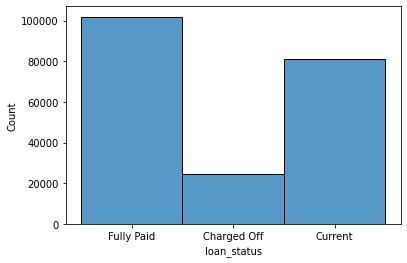

In [4]:
sns.histplot(data=loans_df, x='loan_status');

For our analysis we're not really interested in the ones with a `current` status. Let's drop this category.

In [5]:
loans_df = loans_df[loans_df['loan_status'] != 'Current']
loans_df.shape

(126679, 16)

Coming back on our previous scatterplot. Do we have lot's of loans with late payments?

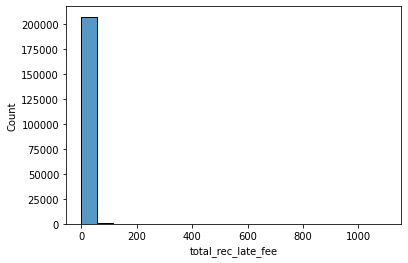

In [9]:
sns.histplot(data=loans_df, x='total_rec_late_fee');

Not superclear? Let's filter on late payments above $100 and check the late fees again

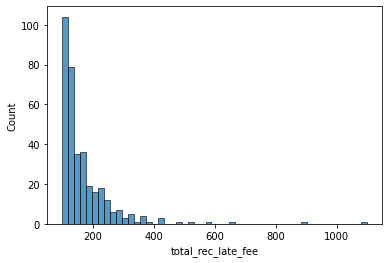

In [10]:
late_df = loans_df[loans_df['total_rec_late_fee'] > 100]
sns.histplot(data=late_df, x='total_rec_late_fee');

#### Boxplots

**Boxplots** are usefull to display the distribution of a numerical variable over multiple categories. In one quick glance it's easy to see how different values like median and spread are over these categories

How are loans distributed over different situations of house ownership?

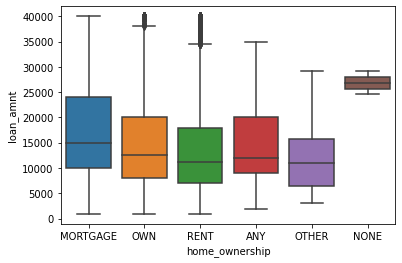

In [11]:
sns.boxplot(data=loans_df, x='home_ownership', y = 'loan_amnt');

What's the distribution of loan_amnt for the different purposes of loans?

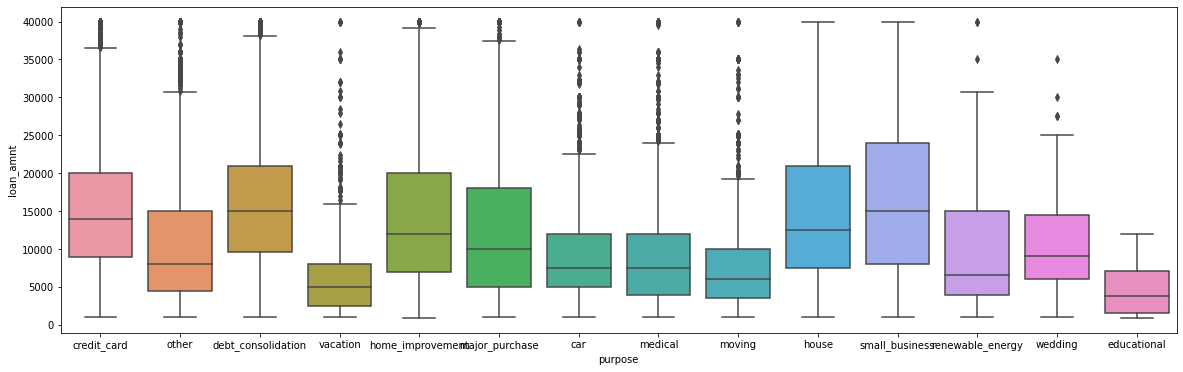

In [12]:
plt.figure(figsize=(20,6))
sns.boxplot(data=loans_df, x='purpose', y = 'loan_amnt');

#### Bar charts

**Boxplots** show us the distribution of multiple categories. They however don't tell us anything on how big these categories are. Here we can use bar charts (or countplots in seaborn)

Let's plot the barcharts for the variables we used in the boxplots

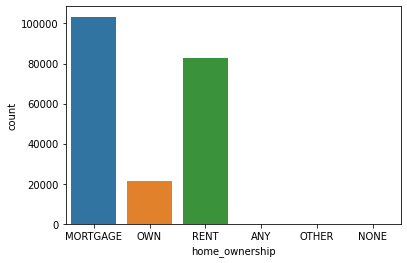

In [13]:
sns.countplot(data=loans_df, x='home_ownership');

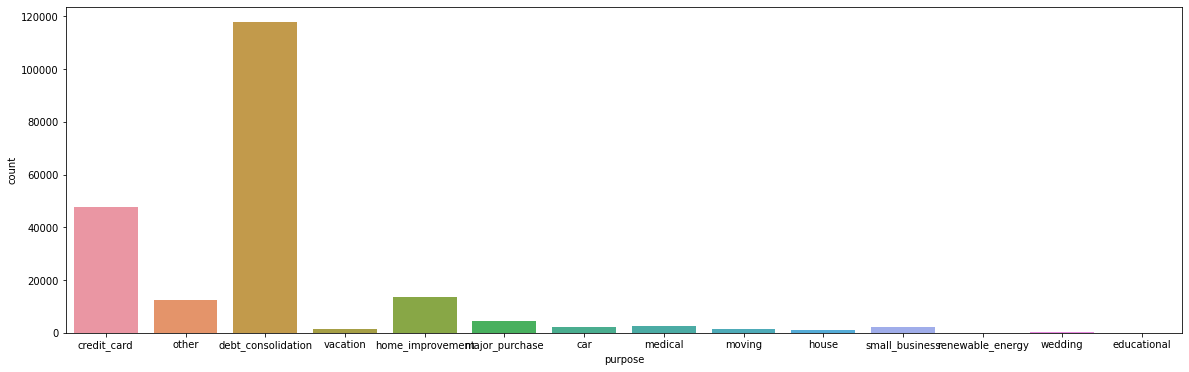

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(data=loans_df, x='purpose');

#### Lineplots

Lineplots are generally used to display a value over time. We don't really have a time value here, besides maybe `emp_length` and `term`. If you check the types of the dataframe again you can see however that they are considered as an **object** by pandas which is the same as a string. This is because they mixed integers with strings.

Let's check them further in detail to see if we can change them to suit us better

Let's check how many values we have for `term`

In [15]:
loans_df.term.value_counts()

 36 months    147483
 60 months     60471
Name: term, dtype: int64

And now for `emp_length`

In [16]:
loans_df.emp_length.value_counts()

10 year    73759
2 year     20119
0 year     18595
3 year     17868
1 year     14526
5 year     13592
4 year     13260
6 year     10035
7 year      9172
8 year      9046
9 year      7982
Name: emp_length, dtype: int64

`term` only has two values, meaning it's a **binary** column. We'll learn how to handle this later throughout the classes.

`emp_length` has a lot more though. Here it makes sense to remove the text so that we can consider this one as a numerical column.

We can use the **.str** method to use string methods on the column. We can then use the `.replace()` method to replace `' year'` with nothing and hence making it a numerical column.

In [17]:
loans_df.emp_length.str

In [18]:
loans_df.emp_length.str.replace(' years', '')

0          5 year
1         10 year
2          5 year
3          1 year
4         10 year
           ...   
207949    10 year
207950     2 year
207951     5 year
207952     2 year
207953    10 year
Name: emp_length, Length: 207954, dtype: object

Let's now chain this structure multiple times to clear out all the string values

In [19]:
loans_df['emp_length'] = loans_df.emp_length.str.replace(' year', '')

We can then use `.astype()` to change the column to an integer

In [20]:
loans_df['emp_length'] = loans_df.emp_length.astype('int')

Now let's recheck the types to see if our changes helped

In [21]:
loans_df.dtypes

Unnamed: 0              int64
id                      int64
loan_amnt             float64
term                   object
int_rate              float64
installment           float64
grade                  object
sub_grade              object
emp_length              int64
home_ownership         object
annual_inc            float64
addr_state             object
dti                   float64
total_rec_late_fee    float64
purpose                object
loan_status            object
dtype: object

Now let's plot our lineplot to see if we give bigger loans to people who are longer in employment

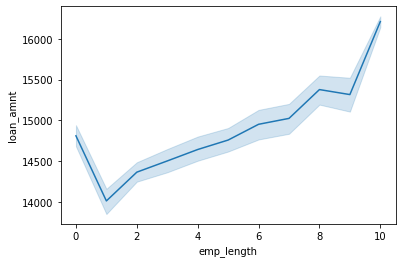

In [22]:
sns.lineplot(data=loans_df, x='emp_length', y='loan_amnt');

The lineplot will give us the average loan amount per year in employment. Not convinced? Let's manually group our dataframe by `emp_length` and take the `mean` of the loan amount. We can then use the built-in pandas-method `.plot()` to show a line plot.

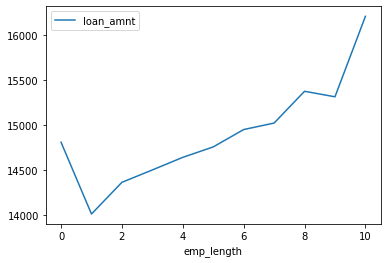

In [23]:
loans_df.groupby('emp_length')[['loan_amnt']].mean().plot();

#### Save csv

Save the csv for further use throughout the classes

In [40]:
loans_df.to_csv('../data/loans_day1.csv')